# Decision Tree: Tennis Example

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Aug  2 11:25:59 2020

@author: ashesh
"""

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [2]:
# Create URL
url = "c:\\dropbox\\variance\\unsw\\zzsc5836\\raw_data\\data_tennis.csv"

# Load dataset
dataframe = pd.read_csv(url)
dataframe.dropna(inplace = True) 
featureframe = dataframe.iloc[:, 1 : -1 ]
targetframe = dataframe.iloc[:,  -1 ]

# For more on descriptive statistics in pandas
# see https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm
print("================ =============== ")
print(featureframe.describe())
print("================ =============== ")


dummy_cols = [ 'outlook', 'temp', 'humidity', 'wind'] 

ff = pd.get_dummies(featureframe, columns=dummy_cols, drop_first=True) 
feature_names = ff.columns
features = pd.DataFrame(ff).to_numpy( )

tf = pd.get_dummies(targetframe, columns=['play'] , drop_first=True) 
target_name = tf.columns
target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)

================ =============== 
       outlook  temp humidity  wind
count       42    42       42    42
unique       3     3        2     2
top      Sunny  Mild     High  Weak
freq        15    18       21    24
================ =============== 


In [3]:
print(features.shape)
print(features[:5])
print(target.shape)
print(target[:5])

(42, 6)
[[0 1 1 0 0 1]
 [0 1 1 0 0 0]
 [0 0 1 0 0 1]
 [1 0 0 1 0 1]
 [1 0 0 0 1 1]]
(42,)
[0 0 0 1 1]


|--- wind_Weak <= 0.50
|   |--- temp_Hot <= 0.50
|   |   |--- outlook_Sunny <= 0.50
|   |   |   |--- outlook_Rain <= 0.50
|   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |--- outlook_Rain >  0.50
|   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |--- outlook_Sunny >  0.50
|   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- temp_Hot >  0.50
|   |   |--- weights: [3.00, 0.00] class: 0
|--- wind_Weak >  0.50
|   |--- temp_Mild <= 0.50
|   |   |--- temp_Hot <= 0.50
|   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |--- temp_Hot >  0.50
|   |   |   |--- humidity_Normal <= 0.50
|   |   |   |   |--- outlook_Sunny <= 0.50
|   |   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |   |--- outlook_Sunny >  0.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- humidity_Normal >  0.50
|   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- temp_Mild >  0.50
|   |   |--- outlook_Rain <= 0.50
|   |   |   |--- weights: [3.00,

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


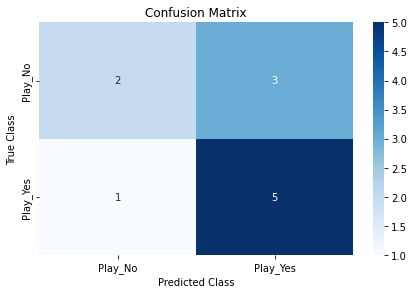

In [6]:
# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=25)

#%%

tree_depth = 20
min_in_leaf = 1
#classifier =  DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
classifier =  DecisionTreeClassifier(max_features="auto", random_state=25, min_samples_leaf=min_in_leaf, max_depth=tree_depth)

# train model 
decision_tree = classifier.fit(features_train, target_train)

#plot_tree(decision_tree) 
r = export_text(decision_tree, show_weights=True, feature_names= list(ff.columns)) 
print(r)
 
# now make predictions
target_predicted = decision_tree.predict(features_test)


from sklearn.metrics import classification_report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print("\nClassification Report:")
print(classification_report(target_test, target_predicted))

#print the accuracy score
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:")
print(accuracy_score(target_test, target_predicted))

# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)


# create pandas dataframe
class_names = ['Play_No', 'Play_Yes']
dataframe_Confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()